In [1]:
import pandas as pd

In [42]:
def getNodesEdges(filename):
    """
    Get nodes and edges from a file
    """
    nodes = set()
    edges = []
    with open(filename, 'r') as f:
        for line in f:
            src, dst = line.strip().split()
            nodes.add(src)
            nodes.add(dst)
            edges.append((src, dst))
    print("Number of Nodes:", len(nodes))
    print("Number of Edges:", len(edges))
    return nodes, edges
    
    
nodes, edges = getNodesEdges("../Data/wiki-Vote.txt")

Number of Nodes: 7115
Number of Edges: 103689


In [3]:
def calculatePageRank(nodes, edges, dampingFactor=0.85, iterations=10):
    """
    Calculate the PageRank of each node
    """
    # Initialize the page rank dictionary with 1/N for all nodes
    pageRank = {node: 1/len(nodes) for node in nodes}
    # Iterate 'iterations' times
    for i in range(iterations):
        print("Iteration", i)
        # Create a dictionary of outgoing links with default 0
        links = {node: 0 for node in nodes}
        # Count how many links point from each node
        for src, dst in edges:
            links[src] += 1
        # Calculate the page rank of each node
        for node in nodes:
            # Calculate the part of the equation where the dangling nodes come in
            if links[node] == 0:
                pageRank[node] = (1 - dampingFactor) / len(nodes)
            else:
                # Calculate the part of the equation where the links come in
                pageRank[node] = (1 - dampingFactor) / len(nodes) + dampingFactor * sum(pageRank[dst] / links[dst] for dst in nodes if links[dst] != 0)
    return pageRank

def calculateAuthorityScore(nodes, edges, dampingFactor=0.85, iterations=10):
    """
    Calculate the Authority Score of each node
    """
    # Initialize the page rank dictionary with 1/N for all nodes
    authorityScore = {node: 1/len(nodes) for node in nodes}
    # Iterate 'iterations' times
    for i in range(iterations):
        print("Iteration", i)
        # Create a dictionary of incoming links with default 0
        links = {node: 0 for node in nodes}
        # Count how many links point to each node
        for src, dst in edges:
            links[dst] += 1
        # Calculate the authority score of each node
        for node in nodes:
            # Calculate the part of the equation where the dangling nodes come in
            if links[node] == 0:
                authorityScore[node] = (1 - dampingFactor) / len(nodes)
            else:
                # Calculate the part of the equation where the links come in
                authorityScore[node] = (1 - dampingFactor) / len(nodes) + dampingFactor * sum(authorityScore[src] / links[src] for src in nodes if links[src] != 0)
    return authorityScore

def calculateHubScore(nodes, edges, dampingFactor=0.85, iterations=10):
    """
    Calculate the Hub Score of each node
    """
    # Initialize the page rank dictionary with 1/N for all nodes
    hubScore = {node: 1/len(nodes) for node in nodes}
    # Iterate 'iterations' times
    for i in range(iterations):
        print("Iteration", i)
        # Create a dictionary of outgoing links with default 0
        links = {node: 0 for node in nodes}
        # Count how many links point from each node
        for src, dst in edges:
            links[src] += 1
        # Calculate the hub score of each node
        for node in nodes:
            # Calculate the part of the equation where the dangling nodes come in
            if links[node] == 0:
                hubScore[node] = (1 - dampingFactor) / len(nodes)
            else:
                # Calculate the part of the equation where the links come in
                hubScore[node] = (1 - dampingFactor) / len(nodes) + dampingFactor * sum(hubScore[dst] / links[dst] for dst in nodes if links[dst] != 0)
    return hubScore

In [43]:
import networkx as nx

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G.number_of_edges(), G.number_of_nodes()

(103689, 7115)

In [48]:
pr = nx.pagerank(G)

In [49]:
hub, auth = nx.hits(G)

In [50]:
# dataframe for combined results
combined = pd.DataFrame(columns=['Node', 'PageRank', 'Authority', 'Hub'])
combined['Node'] = pd.Series(pr.keys())
combined['PageRank'] = pd.Series(pr.values())
combined['Authority'] = pd.Series(auth.values())
combined['Hub'] = pd.Series(hub.values())
combined


,Node,PageRank,Authority,Hub
0,6731,0.000050,-0.000000,0.000013
1,4107,0.000050,-0.000000,0.000012
2,4857,0.000050,-0.000000,0.000016
3,3156,0.000050,-0.000000,0.000012
4,4715,0.000279,0.000738,0.000109
...,...,...,...,...
7110,4095,0.000050,-0.000000,0.000027
7111,3162,0.000050,-0.000000,0.000037
7112,7586,0.000050,-0.000000,0.000071
7113,7996,0.000130,0.000100,-0.000000


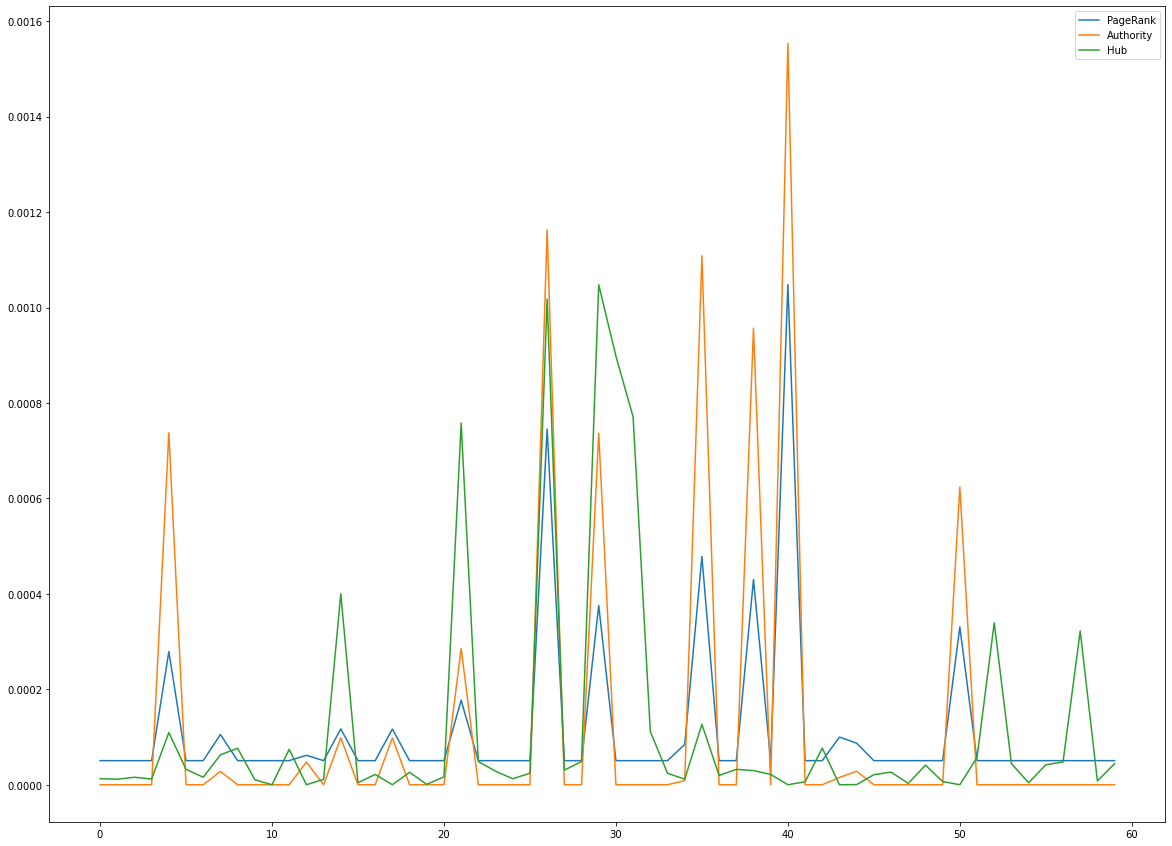

In [51]:
import matplotlib.pyplot as plt
window_start = 0
window_end = 60
plt.figure(figsize=(20,15))
plt.plot(range(len(nodes))[window_start:window_end], combined['PageRank'][window_start:window_end], label='PageRank')
plt.plot(range(len(nodes))[window_start:window_end], combined['Authority'][window_start:window_end], label='Authority')
plt.plot(range(len(nodes))[window_start:window_end], combined['Hub'][window_start:window_end], label='Hub')
plt.legend()